In [1]:
import numpy as np
import pandas as pd

import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

def score_dataset(x, y, model=XGBClassifier(random_state=17)):
    for i in x.select_dtypes(['object', 'category']):
        x[i], _ = x[i].factorize()
    score = cross_val_score(model, x, y, cv=5, scoring='roc_auc')
    score = score.mean() 
    return score

#scoring='neg_mean_squared_log_error' для регрессии

# ИДЕИ, КОТОРЫЕ МОЖНО ПОПРОБОВАТЬ

1. Категории обычные заменить числовым признаком (возможно, процентом успешности проекта данной категории) [DONE]
2. Возможно проверить, влияет ли длина названия на успешность проекта
3. Выделить главные слова в названиях и оставить только их
4. Создать разницу между дедлайном и запуском проекта и мб посчитать что-то, связанное с суммой, как новую фичу
5. Возможно имеет смысл ввести среднюю запрашиваемую сумму для проекта для каждой категории
6. Pledge > Goals means the kick-starter has raised enough funds so it's successful. So at least don't use the pledge column.
7. Backers - это сторонники. Возможно можно посмотреть на соотношение этого числа со средним, например [DONE]
8. Люди говорят, что в данных есть аномалии со странами, поэтому можно выкинуть сломанные строчки [DONE]
9. Можно создать отдельную колонку, связанную с успехом и суммой для разных стран
10. Убрать из датасета все неопределенные состояния

In [3]:
data = pd.read_csv('Downloads/archive/ks-projects-201801.csv')
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
print('Количество всех строк:', data.shape[0])
print('Количество уникальных ID:', len(data.ID.unique()))

#айди слишком громоздко выглядит, поэтому просто избавимся от него и оставим обычные индексы
data.drop('ID', inplace=True, axis=1)

#создадим нормальный столбец-таргет
data['is_successful'] = data['state'].apply(lambda x: 1 if x =='successful' else 0)
data.drop('state', axis=1, inplace = True)
data.head()

Количество всех строк: 378661
Количество уникальных ID: 378661


,name,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real,is_successful
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,GB,0.0,0.0,1533.95,0
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,15,US,100.0,2421.0,30000.00,0
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,3,US,220.0,220.0,45000.00,0
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,1,US,1.0,1.0,5000.00,0
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,14,US,1283.0,1283.0,19500.00,0


In [5]:
print(score_dataset(data.drop('is_successful', axis=1), data['is_successful']))

C:\Users\petti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:14:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\petti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:14:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\petti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\petti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\petti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9990013837778852


# Работаем со странными аномалиями

In [45]:
#Люди говорят, что в данных есть аномалии со странами, посмотрим, что там не так
print(data.country.value_counts())

strange = data.loc[data['country']=='N,0"']
print(strange.head())
#замечаем, что тут есть один прикол: usd pledged везде nan, проверим кое-что:
print('Количество пустых значений в колонке "usd pledged": ', data['usd pledged'].isna().sum())
print('Среднее количество сторонников: ', strange.backers.mean())
print('Количество успехов: ', strange.is_successful.sum())
# удивительно, но при среднем количестве сторонников = 0, тут каким-то образом есть успешные проекты

# по всей видимости, это какие-то битые данные и использовать их для предсказания не стоит, так что выбросим
data.drop(data.loc[data['country']=='N,0"'].index, axis=0, inplace=True)
print(data.country.value_counts())

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64
                                          name      category main_category  \
169              STREETFIGHTERZ WHEELIE MURICA  Film & Video  Film & Video   
328                Duncan Woods - Chameleon EP         Music         Music   
632  The Making of Ashley Kelley's Debut Album         Music         Music   
647               Butter Side Down Debut Album         Music         Music   
749                    Chase Goehring debut EP         Music         Music   

    currency    deadline    goal             launched  pledged      state  \
169      USD  2014-09-20  6500.0  2014-08-06 21:28:36   555.00  undefined   
328 

In [46]:
data.main_category.value_counts()
#пока что думаю оставить столбец без изменения, потом посмотрим

Film & Video    62697
Music           49530
Publishing      39379
Games           35226
Technology      32562
Design          30067
Art             28153
Food            24599
Fashion         22812
Theater         10912
Comics          10819
Photography     10778
Crafts           8809
Journalism       4754
Dance            3767
Name: main_category, dtype: int64

<AxesSubplot:xlabel='state', ylabel='count'>

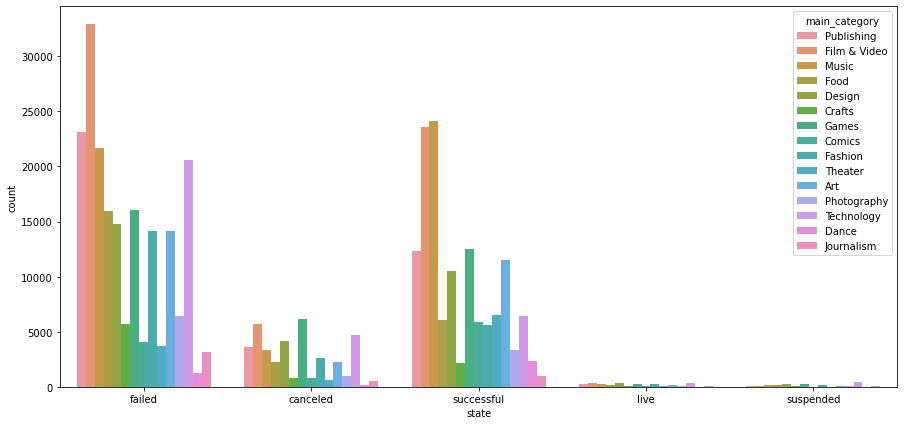

In [47]:
plt.rc('figure', figsize=(15,7))
sns.countplot(data=data, x='state', hue='main_category')

## Работаем с обычными категориями, создаем новые признаки

In [48]:
#Категории обычные заменить числовым признаком (возможно, процентом успешности проекта данной категории)
data['percent_of_success_cat'] = data.groupby('category')['is_successful'].transform('mean')

data.drop('state', axis = 1, inplace=True)
data.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real,is_successful,percent_of_success_cat
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,GB,0.0,0.0,1533.95,0,0.355734
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,15,US,100.0,2421.0,30000.00,0,0.388086
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,3,US,220.0,220.0,45000.00,0,0.388086
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,1,US,1.0,1.0,5000.00,0,0.475262
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,14,US,1283.0,1283.0,19500.00,0,0.331635


<AxesSubplot:xlabel='percent_of_success_cat', ylabel='count'>

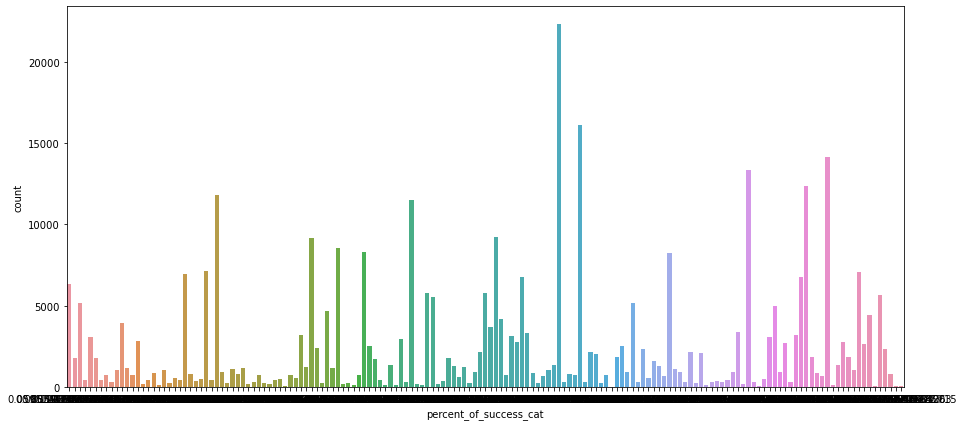

In [50]:
sns.countplot(data=data, x='percent_of_success_cat')

,count,mean,std,min,25%,50%,75%,max
is_successful,,,,,,,,
0,241013.0,19.249455,115.106032,0.0,1.0,3.0,13.0,20632.0
1,133851.0,264.128397,1505.152003,1.0,33.0,71.0,168.0,219382.0


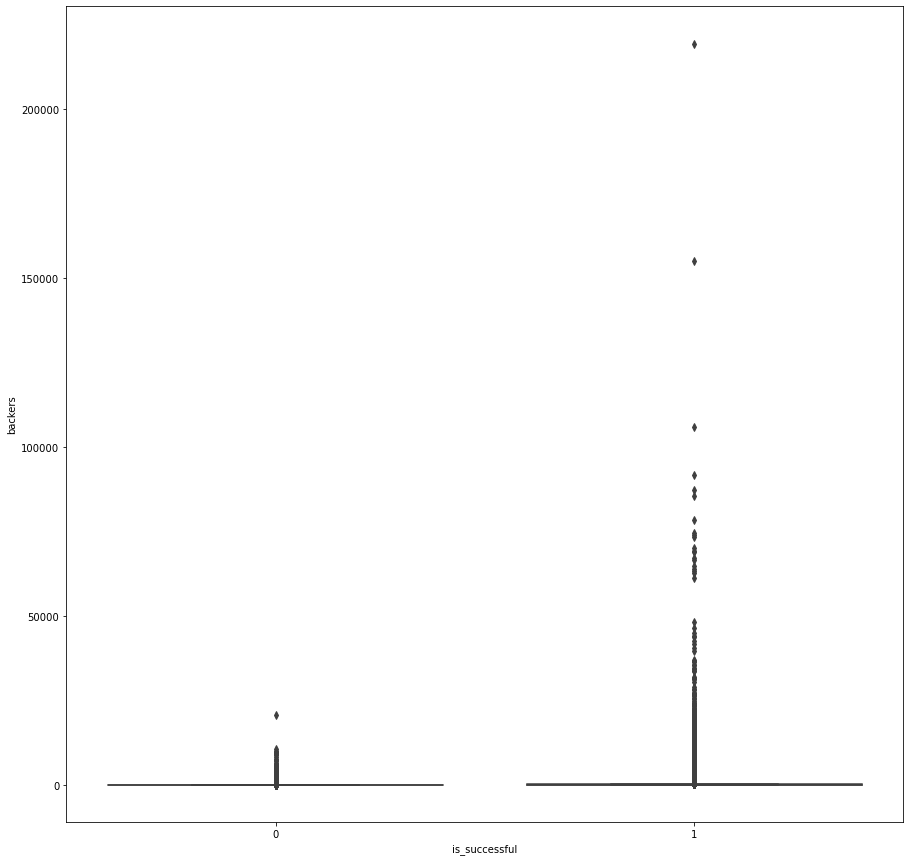

In [52]:
#Backers - это сторонники. Возможно можно посмотреть на соотношение этого числа со средним, например
plt.rc('figure', figsize=(15,15))
sns.boxplot(data=data, x = 'is_successful', y='backers')
#как видим, проекты, у которых стронников много, как правило выживают

data.groupby('is_successful').backers.describe()
#при этом у них просто гигантская дисперсия 0-0, желательно ее как-то стандартизовать

<AxesSubplot:xlabel='is_successful', ylabel='backers'>

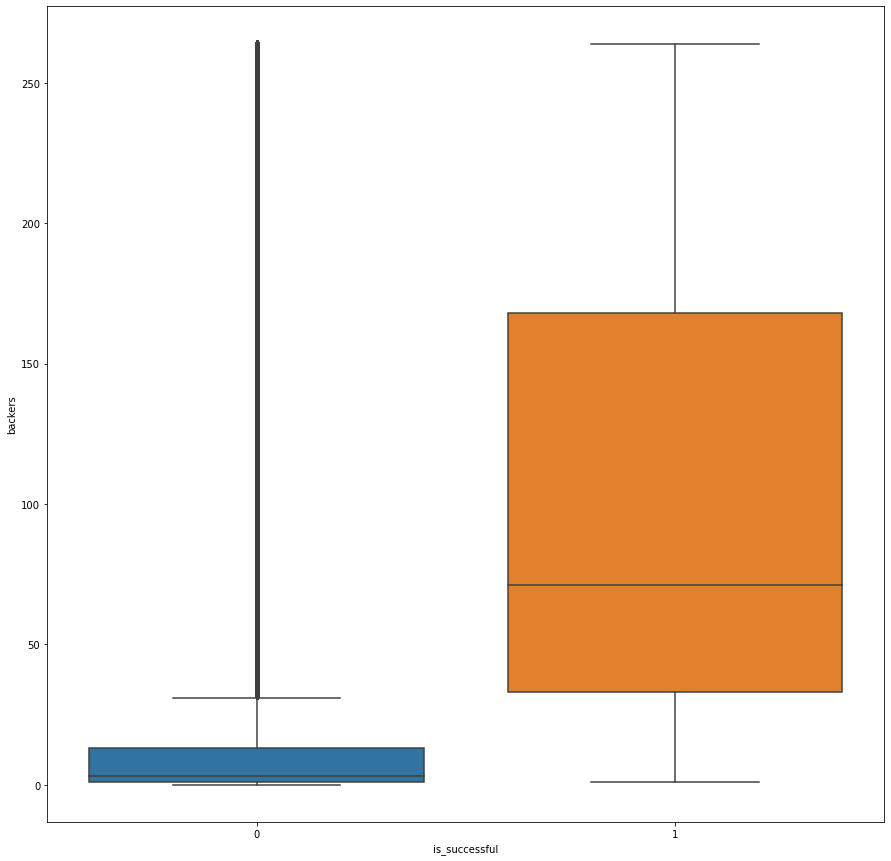

In [53]:
# выбросы заменим на среднее значение успешных проектов (ибо оно больше 75%)
data['backers'] = data['backers'].apply(lambda x: 264 if (x > 264) else x)

sns.boxplot(data=data, x = 'is_successful', y='backers')
# теперь все более менее норм

In [54]:
#считаем среднее количество сторонников для каждой категории
data['mean_backers'] = data.groupby('category')['backers'].transform('mean')

data.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real,is_successful,percent_of_success_cat,mean_backers
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,GB,0.0,0.0,1533.95,0,0.355734,21.865595
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,15,US,100.0,2421.0,30000.00,0,0.388086,53.660112
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,3,US,220.0,220.0,45000.00,0,0.388086,53.660112
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,1,US,1.0,1.0,5000.00,0,0.475262,48.853148
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,14,US,1283.0,1283.0,19500.00,0,0.331635,34.449588


In [55]:
#не думаю, что категории маленькие еще пригодятся, поэтому избавимся от них
data.drop('category', axis=1, inplace=True)

# Работаем со временными признаками

In [66]:
#Создать разницу между дедлайном и запуском проекта и мб посчитать что-то, связанное с суммой, как новую фичу
data.dtypes

data['deadline'] = pd.to_datetime(data['deadline']).dt.date
data['launched'] = pd.to_datetime(data['launched']).dt.date

In [62]:
data.head()

,name,main_category,currency,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real,is_successful,percent_of_success_cat,mean_backers
0,The Songs of Adelaide & Abullah,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.0,0,GB,0.0,0.0,1533.95,0,0.355734,21.865595
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.0,15,US,100.0,2421.0,30000.00,0,0.388086,53.660112
2,Where is Hank?,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,3,US,220.0,220.0,45000.00,0,0.388086,53.660112
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,1,US,1.0,1.0,5000.00,0,0.475262,48.853148
4,Community Film Project: The Art of Neighborhoo...,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.0,14,US,1283.0,1283.0,19500.00,0,0.331635,34.449588


In [70]:
data['how_many_time'] = data['deadline'] - data['launched']
data['how_many_time'] = data['how_many_time'].dt.days
data.head()

,name,main_category,currency,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real,is_successful,percent_of_success_cat,mean_backers,how_many_time
0,The Songs of Adelaide & Abullah,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.0,0,GB,0.0,0.0,1533.95,0,0.355734,21.865595,59
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.0,15,US,100.0,2421.0,30000.00,0,0.388086,53.660112,60
2,Where is Hank?,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,3,US,220.0,220.0,45000.00,0,0.388086,53.660112,45
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,1,US,1.0,1.0,5000.00,0,0.475262,48.853148,30
4,Community Film Project: The Art of Neighborhoo...,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.0,14,US,1283.0,1283.0,19500.00,0,0.331635,34.449588,56


                  count       mean        std  min   25%   50%   75%     max
is_successful                                                               
0              241013.0  35.389518  14.191938  1.0  30.0  30.0  40.0  1000.0
1              133851.0  32.156719  11.772305  1.0  30.0  30.0  34.0    92.0


<AxesSubplot:xlabel='is_successful', ylabel='how_many_time'>

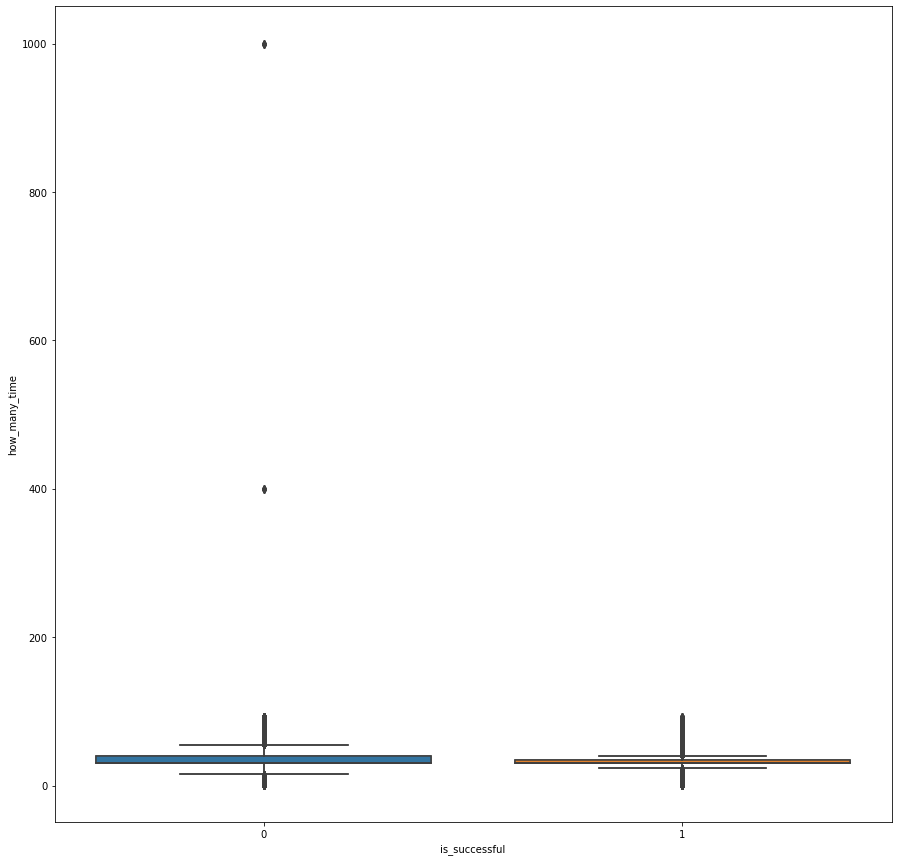

In [77]:
print(data.groupby('is_successful')['how_many_time'].describe())
sns.boxplot(data=data, x='is_successful', y='how_many_time')

<AxesSubplot:xlabel='is_successful', ylabel='how_many_time'>

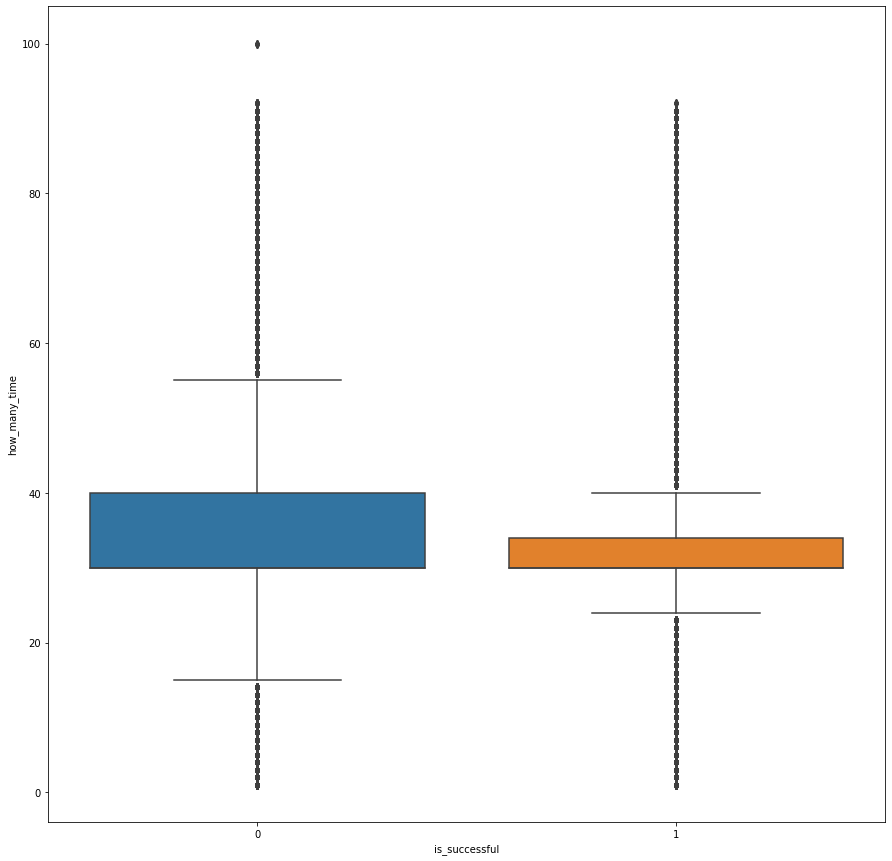

In [80]:
border_value = data['how_many_time'].quantile(.99)
data['how_many_time'] = data['how_many_time'].apply(lambda x: border_value if (x>border_value) else x)
sns.boxplot(data=data, x='is_successful', y='how_many_time')

91.0